In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind

In [ ]:
world_happiness = pd.read_csv("WorldHappinessReport.csv")

# fixing column names
world_happiness.columns = ['Country Name', 'Regional Indicator', 'Year', 'Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']

In [ ]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [ ]:
world_happiness.sample(5)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
1407,New Zealand,North America and ANZ,2018,7.370286,10.665743,0.953863,70.125000,0.949300,0.115251,0.206580,0.785059,0.167951,0.642461
1914,Tajikistan,Commonwealth of Independent States,2020,5.373399,8.203014,0.789745,62.150002,NaN,-0.051335,0.549786,0.651894,0.344161,NaN
2176,Zambia,Sub-Saharan Africa,2016,4.347544,8.126893,0.767047,53.125000,0.811575,0.122042,0.770644,0.687514,0.372241,0.696892
1286,Moldova,Commonwealth of Independent States,2014,5.917058,9.240994,0.804969,62.520000,0.623186,-0.116124,0.924807,0.546722,0.259690,0.177369
1013,Kazakhstan,Commonwealth of Independent States,2022,6.006279,10.186872,0.923373,66.199997,0.882938,0.022408,0.720169,0.652438,0.131949,NaN


In [ ]:
# Filter the data for the year 2021
data_2021 = world_happiness[world_happiness['Year'] == 2021]

<ipython-input-106-31527c37fef0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


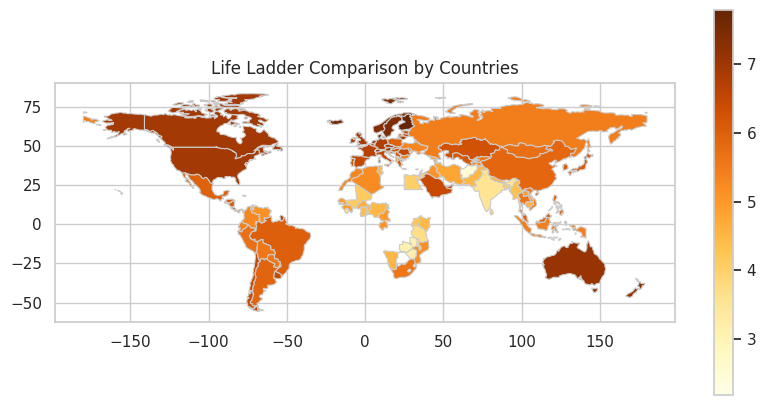

In [ ]:
# load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.loc[world_map['name'] == 'United States of America', 'name'] = 'United States' # america name problem solved
merged = world_map.merge(data_2021, how='left', left_on='name', right_on='Country Name')

# plot the map
plt.figure(figsize=(10, 5))
merged.plot(column='Life Ladder', cmap='YlOrBr', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
plt.title('Life Ladder Comparison by Countries')
plt.show()

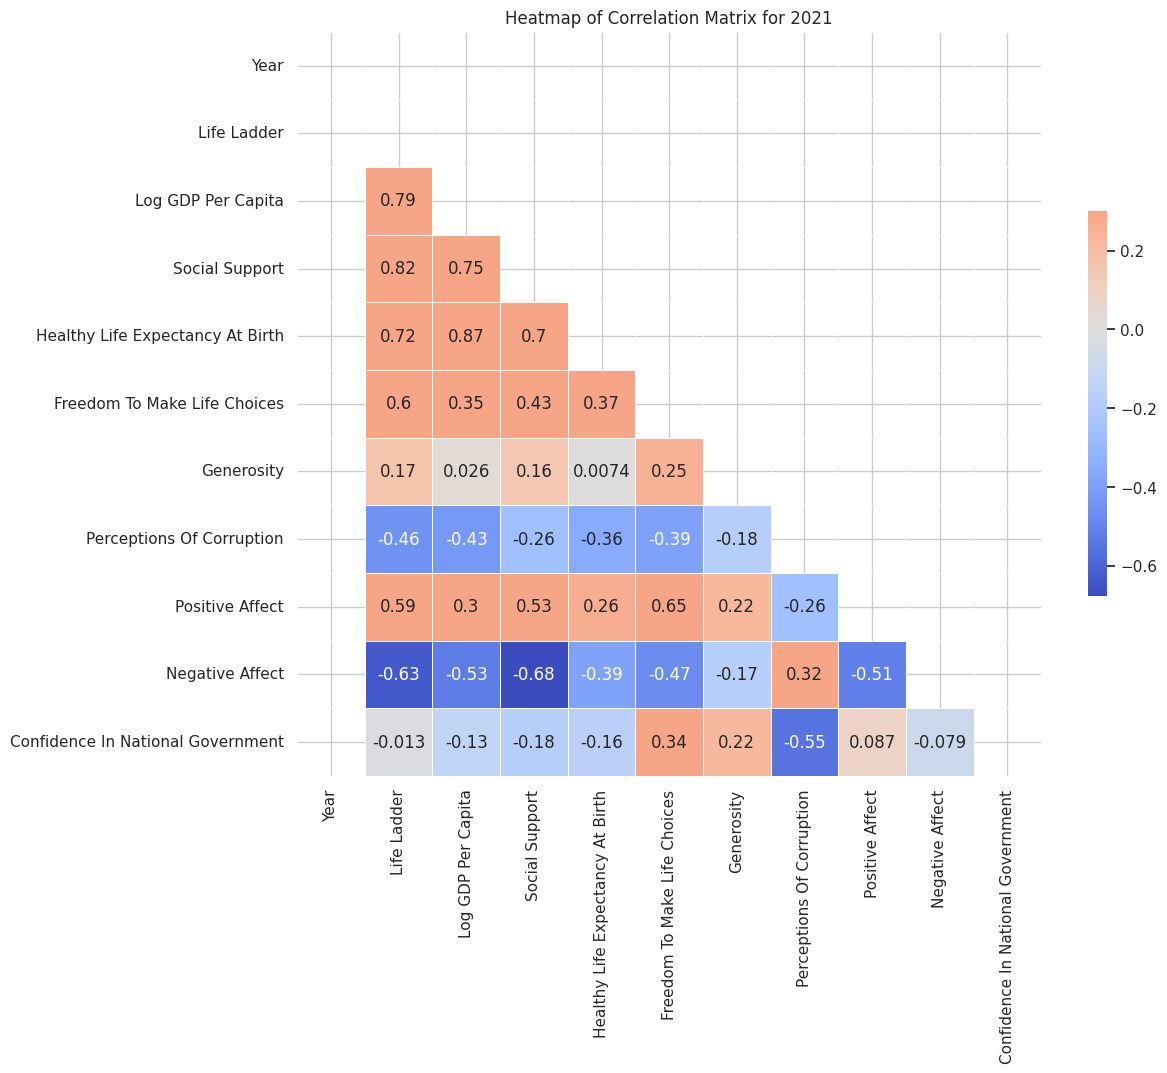

In [ ]:
numeric_data_2021 = data_2021.select_dtypes(include=[np.number]) # drop non-numeric columns
correlation_matrix_2021 = numeric_data_2021.corr() # correlation matrix
mask = np.triu(np.ones_like(correlation_matrix_2021, dtype=bool)) # mask for the upper triangle

# matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2021, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) # heatmap

plt.title('Heatmap of Correlation Matrix for 2021')
plt.show()


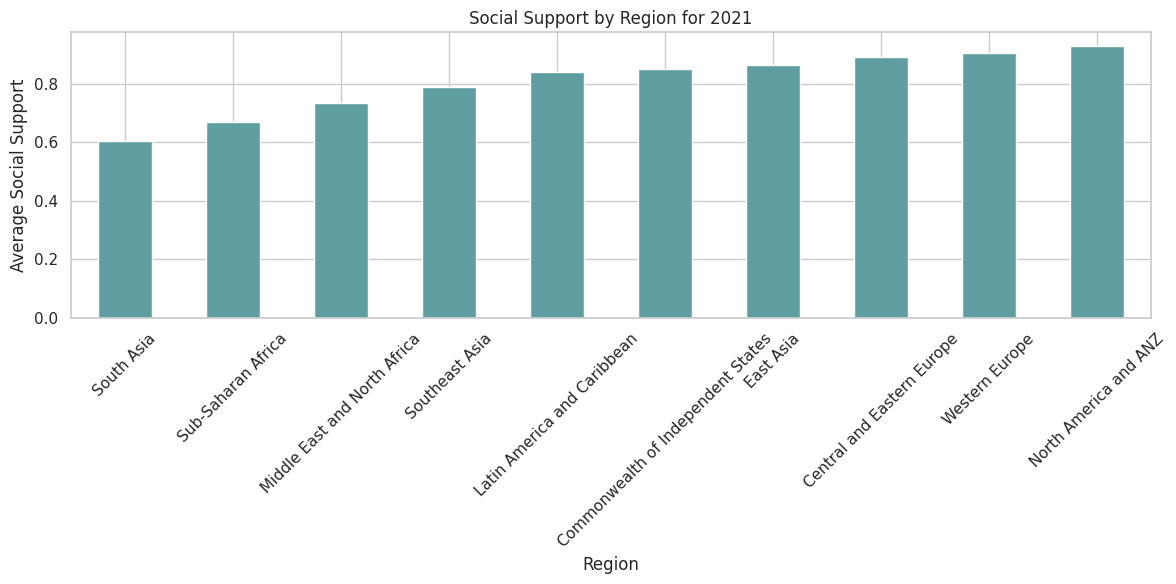

In [ ]:
# 2021 data by 'Regional Indicator' and calculate the mean for 'Social Support'
regional_social_support_2021 = data_2021.groupby('Regional Indicator')['Social Support'].mean().sort_values()

# 2021 Social Support
plt.figure(figsize=(12, 6))
regional_social_support_2021.plot(kind='bar', color='cadetblue')
plt.title('Social Support by Region for 2021')
plt.ylabel('Average Social Support')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


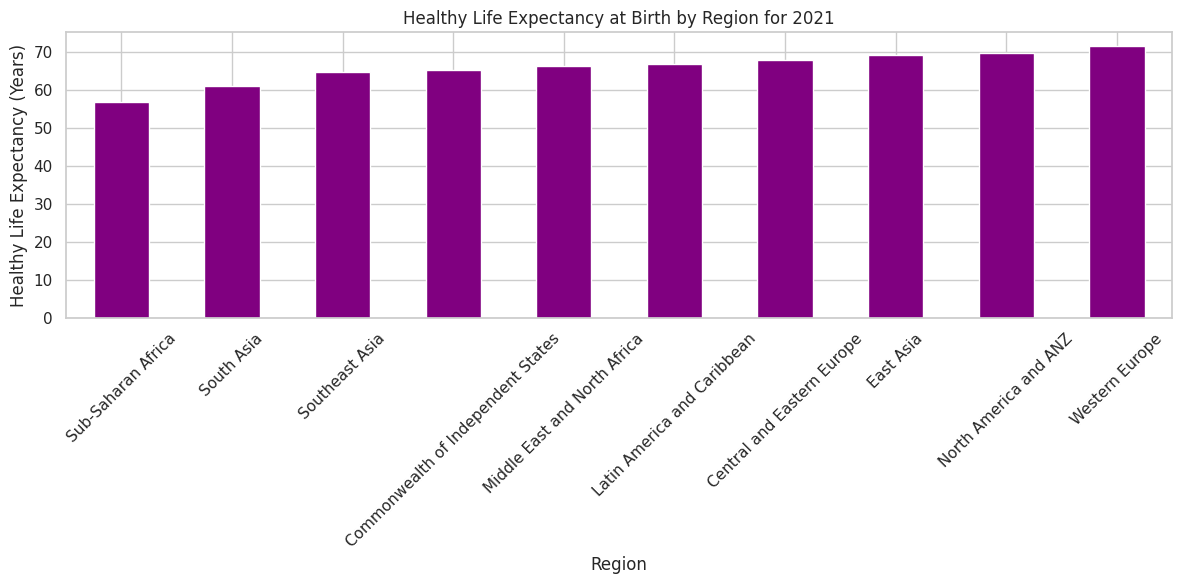

In [ ]:
# 2021 data by 'Regional Indicator' and calculate the mean for 'Healthy Life Expectancy At Birth'
regional_life_expectancy_2021 = data_2021.groupby('Regional Indicator')['Healthy Life Expectancy At Birth'].mean()

# 2021 Healthy Life Expectancy
plt.figure(figsize=(12, 6))
regional_life_expectancy_2021.sort_values().plot(kind='bar', color='purple')
plt.title('Healthy Life Expectancy at Birth by Region for 2021')
plt.ylabel('Healthy Life Expectancy (Years)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

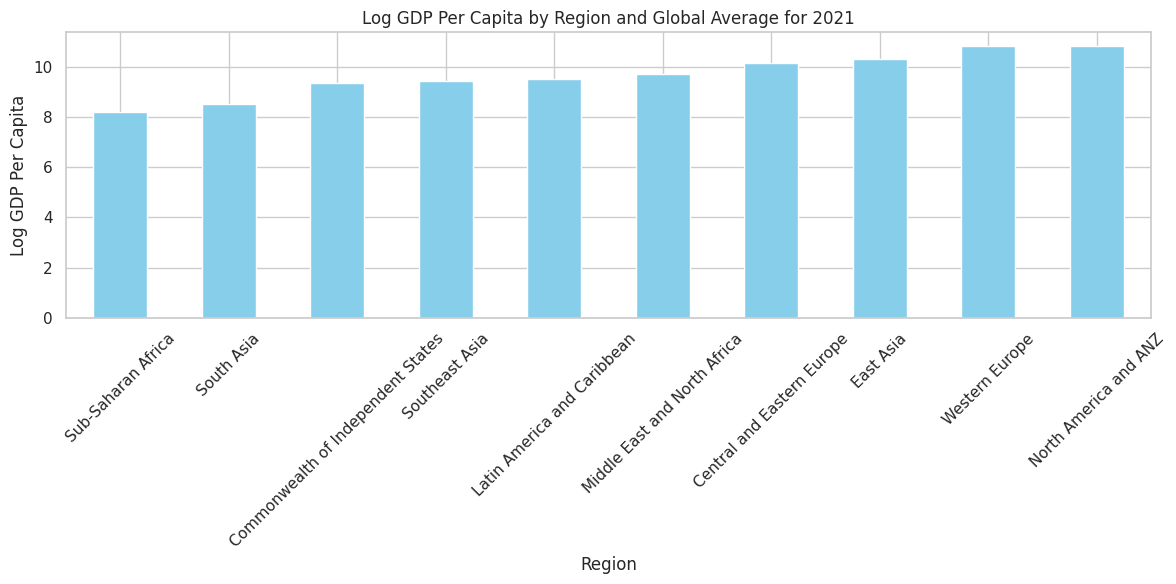

In [ ]:
# 2021 data by 'Regional Indicator' and calculate the mean for 'Log GDP Per Capita'
regional_gdp_per_capita = data_2021.groupby('Regional Indicator')['Log GDP Per Capita'].mean()

# 2021 GDP
plt.figure(figsize=(12, 6))
regional_gdp_per_capita.sort_values().plot(kind='bar', color='skyblue')
plt.title('Log GDP Per Capita by Region and Global Average for 2021')
plt.ylabel('Log GDP Per Capita')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



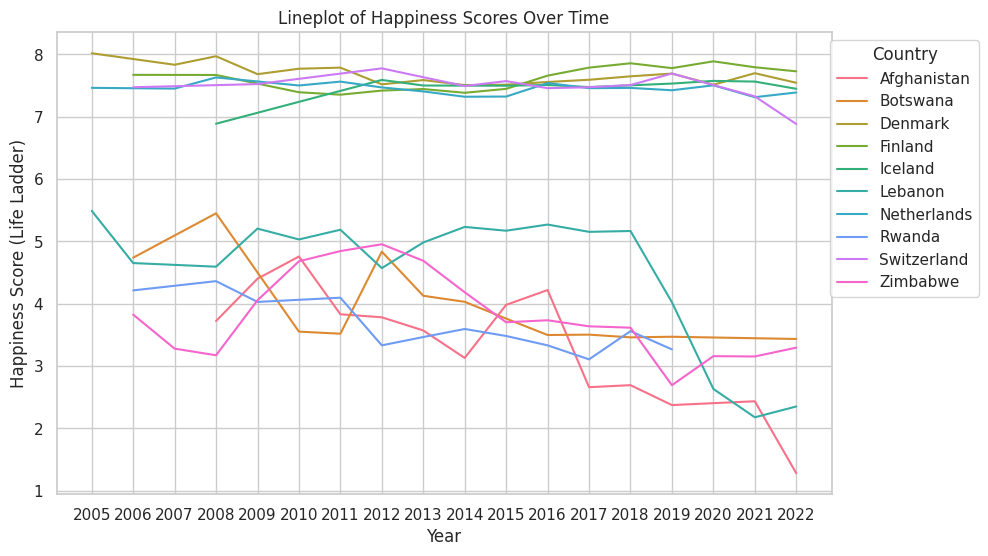

In [ ]:
# top 5 unhappiest
top_least_5 = world_happiness[world_happiness['Country Name'].isin(["Finland", "Denmark", "Iceland", "Switzerland", "Netherlands", "Afghanistan", "Lebanon", "Zimbabwe", "Rwanda", "Botswana"])]

# plot top 5 happiest and top 5 unhappiest
sns.set_palette("husl")
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_least_5, x='Year', y='Life Ladder', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.title('Lineplot of Happiness Scores Over Time')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.2, 1))  # legend position
plt.xticks(top_least_5['Year'].unique().astype(int))
plt.show()


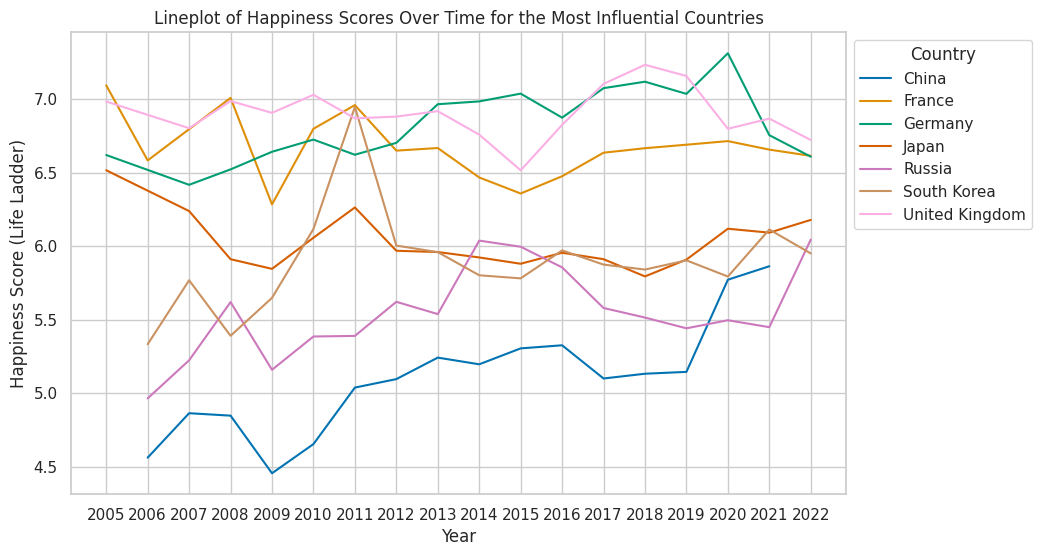

In [ ]:
# most influential countries
select_countries2 = world_happiness[world_happiness['Country Name'].isin(["USA", "China", "Russia", "Germany", "United Kingdom", "South Korea", "France", "Japan"])]

# plot influential
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.lineplot(data=select_countries2, x='Year', y='Life Ladder', hue='Country Name')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.title('Lineplot of Happiness Scores Over Time for the Most Influential Countries')
plt.xticks(top_least_5['Year'].unique().astype(int))
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

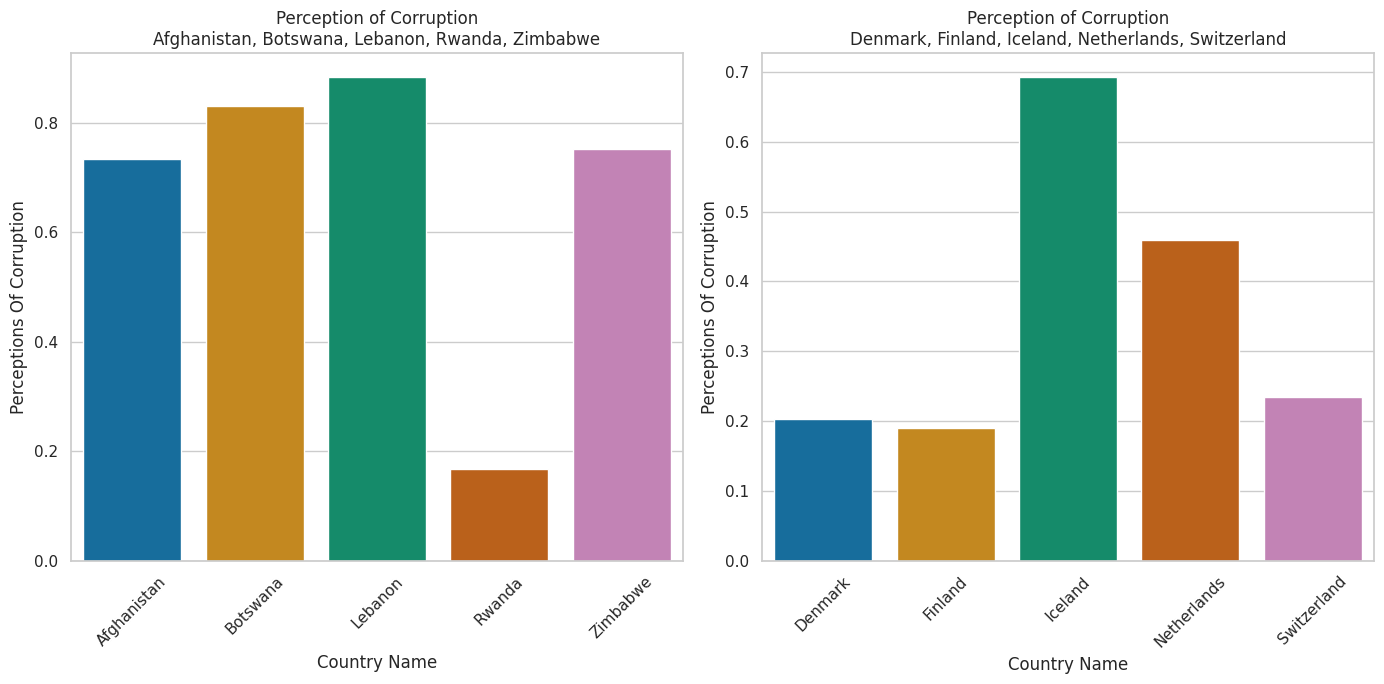

In [ ]:
countries_group1 = ['Afghanistan', 'Botswana', 'Lebanon', 'Rwanda', 'Zimbabwe']
countries_group2 = ['Denmark', 'Finland', 'Iceland', 'Netherlands', 'Switzerland']
data_group1 = world_happiness[world_happiness['Country Name'].isin(countries_group1)]
data_group2 = world_happiness[world_happiness['Country Name'].isin(countries_group2)]
latest_data_group1 = data_group1.sort_values('Year').groupby('Country Name').last().reset_index()
latest_data_group2 = data_group2.sort_values('Year').groupby('Country Name').last().reset_index()

# start plotting
plt.figure(figsize=(14, 7))

# graph first group of countries
plt.subplot(1, 2, 1)
sns.barplot(x='Country Name', y='Perceptions Of Corruption', data=latest_data_group1)
plt.title('Perception of Corruption\nAfghanistan, Botswana, Lebanon, Rwanda, Zimbabwe')
plt.xticks(rotation=45)

# graph second group of countries
plt.subplot(1, 2, 2)
sns.barplot(x='Country Name', y='Perceptions Of Corruption', data=latest_data_group2)
plt.title('Perception of Corruption\nDenmark, Finland, Iceland, Netherlands, Switzerland')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-114-03291d1a7732>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_correlation = top_countries.drop(excluded_variables, axis=1).corr()['Life Ladder'].sort_values(ascending=False)
<ipython-input-114-03291d1a7732>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bottom_correlation = bottom_countries.drop(excluded_variables, axis=1).corr()['Life Ladder'].sort_values(ascending=False)


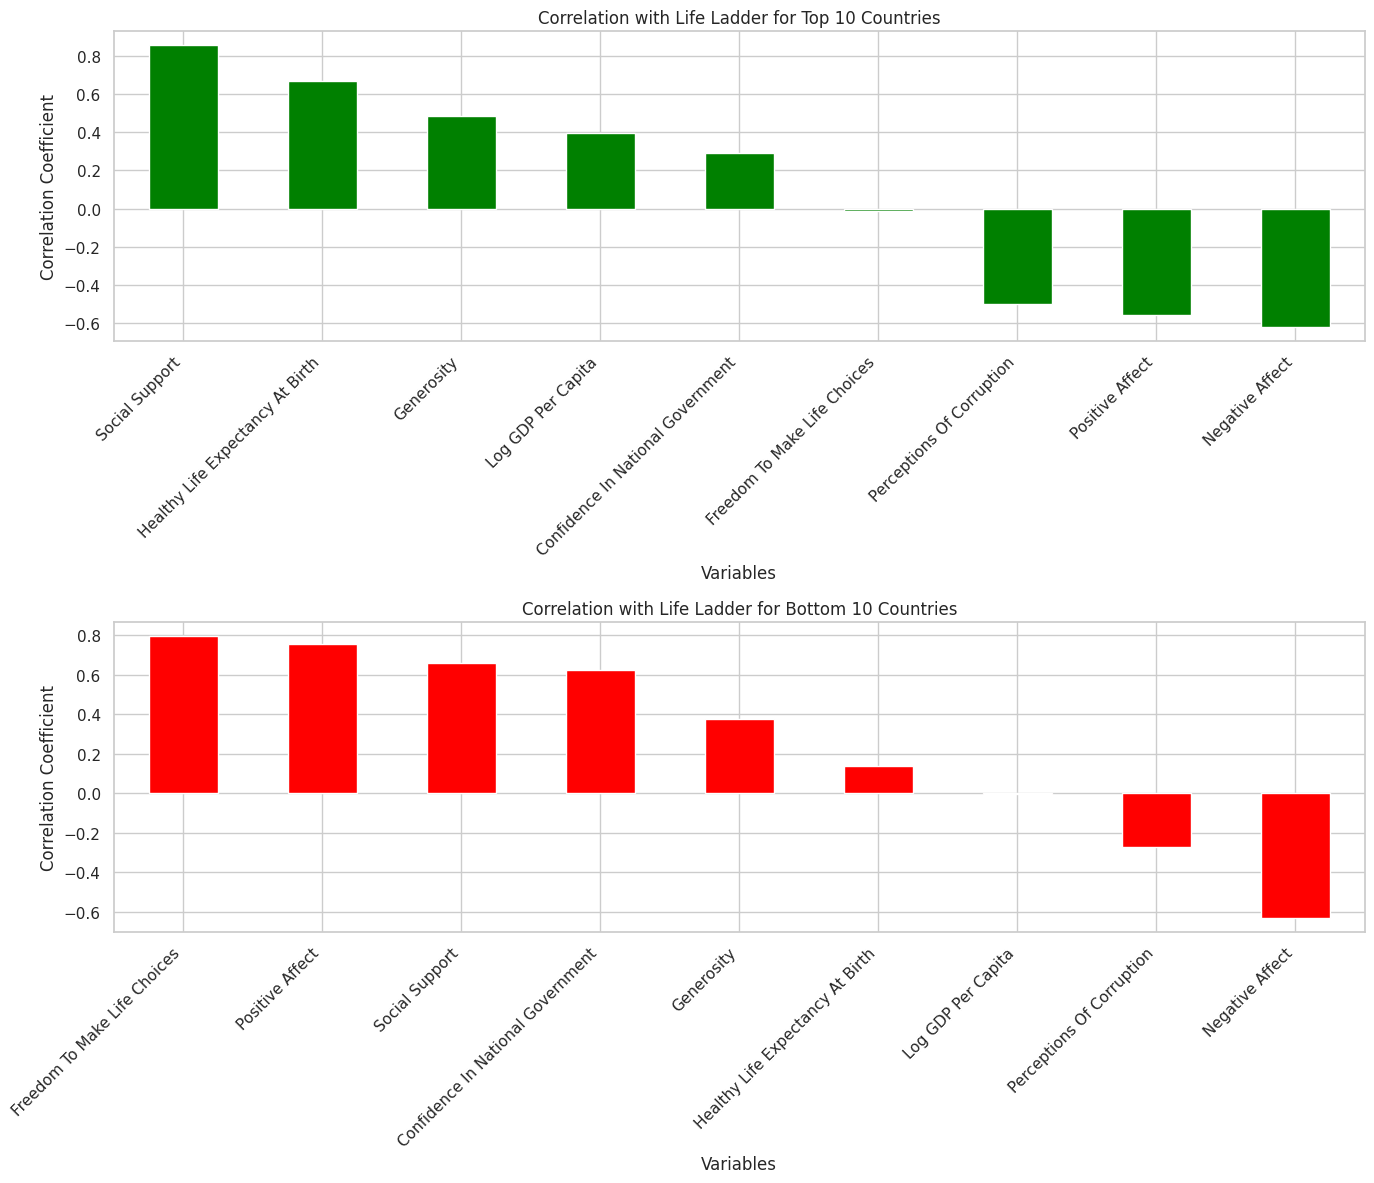

Correlation with Life Ladder for Top 10 Countries:
Life Ladder                          1.000000
Social Support                       0.853958
Healthy Life Expectancy At Birth     0.665652
Generosity                           0.482867
Log GDP Per Capita                   0.394260
Confidence In National Government    0.293716
Freedom To Make Life Choices        -0.011153
Perceptions Of Corruption           -0.497959
Positive Affect                     -0.557261
Negative Affect                     -0.618121
Name: Life Ladder, dtype: float64

Correlation with Life Ladder for Bottom 10 Countries:
Life Ladder                          1.000000
Freedom To Make Life Choices         0.794755
Positive Affect                      0.756725
Social Support                       0.657561
Confidence In National Government    0.624467
Generosity                           0.374558
Healthy Life Expectancy At Birth     0.136895
Log GDP Per Capita                  -0.001349
Perceptions Of Corruption       

In [ ]:
latest_data = world_happiness.sort_values('Year').groupby('Country Name').last().reset_index()

# top 10 and bottom 10 countries based on their Life Ladder score
top_countries = latest_data.nlargest(10, 'Life Ladder')
bottom_countries = latest_data.nsmallest(10, 'Life Ladder')

# year is in a different scale, so we exclude
excluded_variables = ['Year']

# correlation of all variables
top_correlation = top_countries.drop(excluded_variables, axis=1).corr()['Life Ladder'].sort_values(ascending=False)
bottom_correlation = bottom_countries.drop(excluded_variables, axis=1).corr()['Life Ladder'].sort_values(ascending=False)

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# top countries correlation
top_correlation.drop('Life Ladder').plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Correlation with Life Ladder for Top 10 Countries')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Correlation Coefficient')
axes[0].set_xticklabels(top_correlation.drop('Life Ladder').index, rotation=45, ha='right')  # Rotate x-axis labels

# bottom countries correlation
bottom_correlation.drop('Life Ladder').plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Correlation with Life Ladder for Bottom 10 Countries')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Correlation Coefficient')
axes[1].set_xticklabels(bottom_correlation.drop('Life Ladder').index, rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()

# correlation values for insight
print("Correlation with Life Ladder for Top 10 Countries:")
print(top_correlation)
print("\nCorrelation with Life Ladder for Bottom 10 Countries:")
print(bottom_correlation)


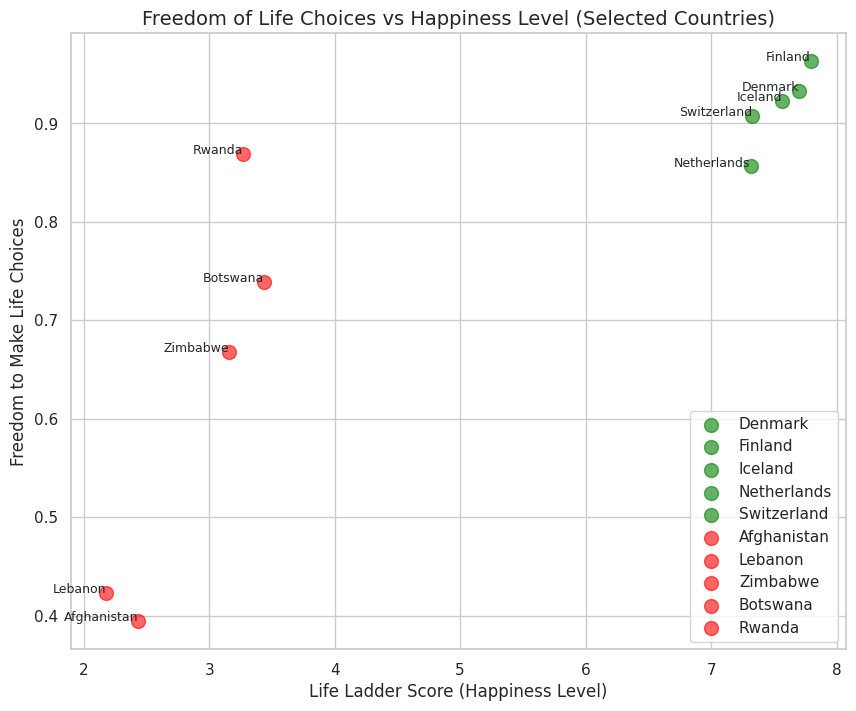

In [ ]:
happiest_countries = ['Denmark', 'Finland', 'Iceland', 'Netherlands', 'Switzerland']
unhappiest_countries = ['Afghanistan', 'Botswana', 'Lebanon', 'Rwanda', 'Zimbabwe']

# check Botswana and Rwanda in dataset 2021
# if not present, check the most recent data available
botswana_2021 = data_2021[data_2021['Country Name'] == 'Botswana']
rwanda_2021 = data_2021[data_2021['Country Name'] == 'Rwanda']
if botswana_2021.empty:
    botswana_most_recent = world_happiness[world_happiness['Country Name'] == 'Botswana'].nlargest(1, 'Year')
else:
    botswana_most_recent = botswana_2021

if rwanda_2021.empty:
    rwanda_most_recent = world_happiness[world_happiness['Country Name'] == 'Rwanda'].nlargest(1, 'Year')
else:
    rwanda_most_recent = rwanda_2021

# filter
specified_happiest = data_2021[data_2021['Country Name'].isin(happiest_countries)]
specified_unhappiest = data_2021[data_2021['Country Name'].isin(unhappiest_countries)]
specified_combined_data_with_missing = pd.concat([specified_happiest, specified_unhappiest, botswana_most_recent, rwanda_most_recent]) # combine data

# plot
plt.figure(figsize=(10, 8))
for i in specified_combined_data_with_missing.iterrows():
    country_data = i[1]
    color = 'green' if country_data['Country Name'] in happiest_countries else 'red'
    plt.scatter(country_data['Life Ladder'], country_data['Freedom To Make Life Choices'],
                color=color, s=100, alpha=0.6, label=country_data['Country Name'])

    plt.text(country_data['Life Ladder'], country_data['Freedom To Make Life Choices'],
             country_data['Country Name'], fontsize=9, ha='right')

plt.title('Freedom of Life Choices vs Happiness Level (Selected Countries)', fontsize=14)
plt.xlabel('Life Ladder Score (Happiness Level)', fontsize=12)
plt.ylabel('Freedom to Make Life Choices', fontsize=12)

# remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.legend(loc='lower right')

plt.grid(True)
plt.show()


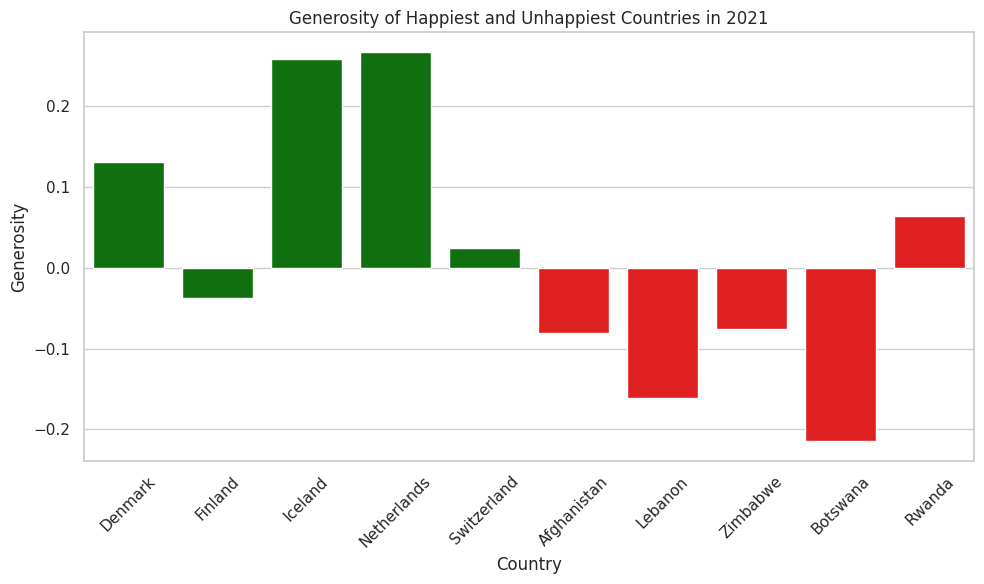

In [ ]:
sns.set(style="whitegrid")

# vertical barplot for generosity
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='Generosity', data=specified_combined_data_with_missing,
            palette=['green' if country in happiest_countries else 'red' for country in specified_combined_data_with_missing['Country Name']])

plt.xticks(rotation=90)
plt.title('Generosity of Happiest and Unhappiest Countries in 2021')
plt.ylabel('Generosity')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


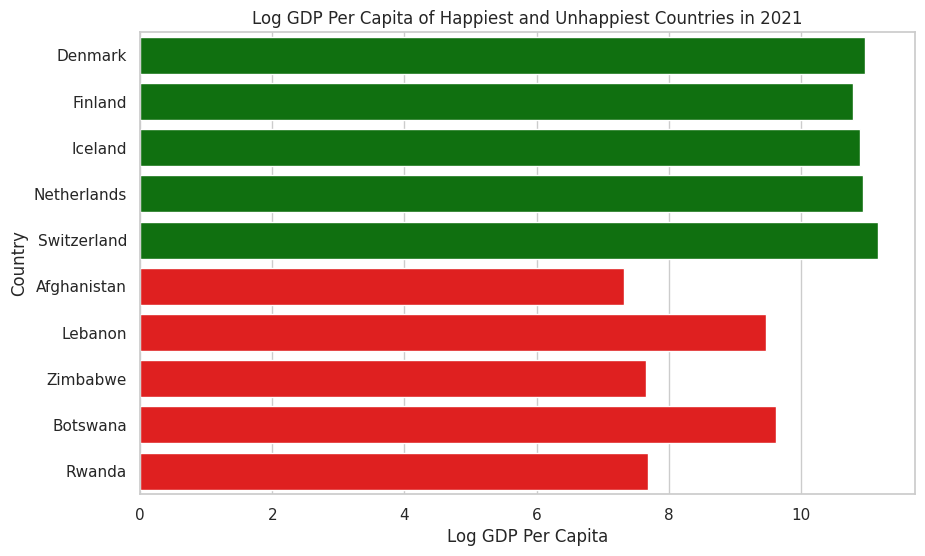

In [ ]:
# barplot for gdp
plt.figure(figsize=(10, 6))
sns.barplot(x='Log GDP Per Capita', y='Country Name', data=specified_combined_data_with_missing,
            palette=['green' if x in happiest_countries else 'red' for x in specified_combined_data_with_missing['Country Name']])
plt.title('Log GDP Per Capita of Happiest and Unhappiest Countries in 2021')
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Country')
plt.show()


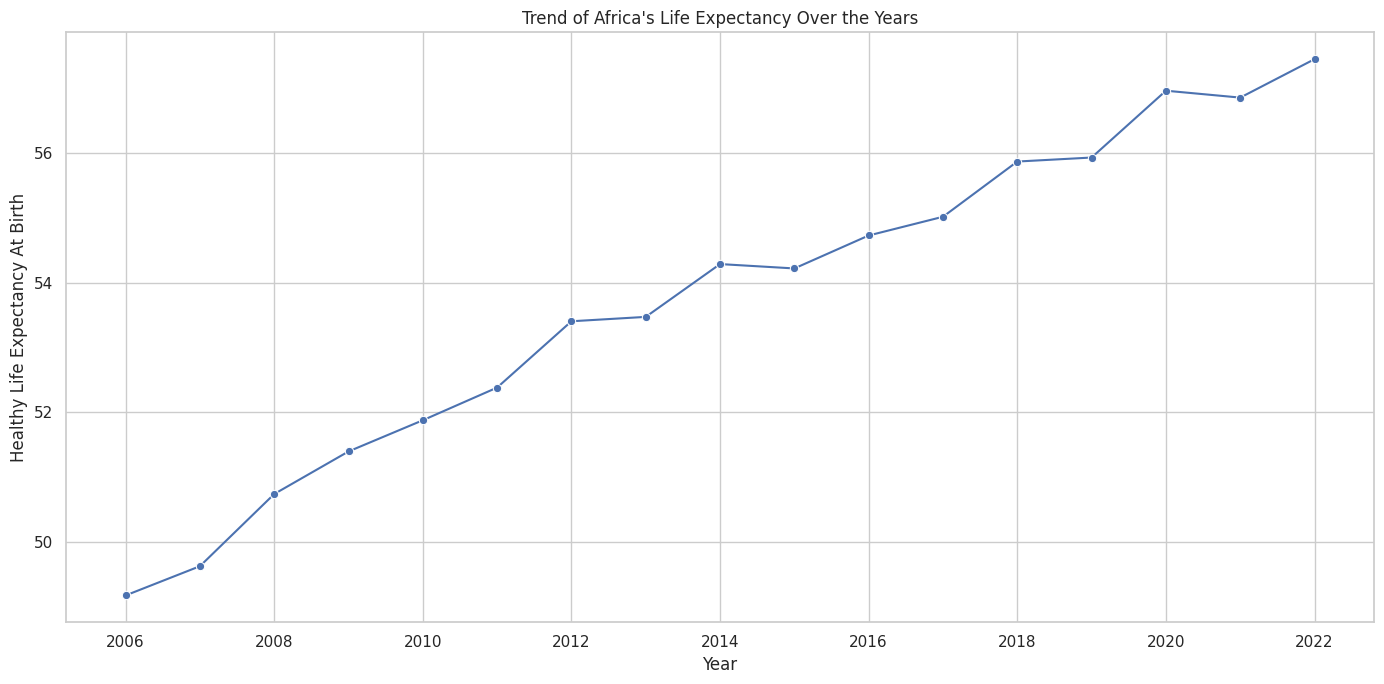

In [ ]:
african_data = world_happiness[world_happiness['Regional Indicator'] == 'Sub-Saharan Africa']

# group by year and calculate mean of 'Healthy Life Expectancy At Birth'
african_life_expectancy_trend = african_data.groupby('Year')['Healthy Life Expectancy At Birth'].mean().reset_index()

# plot trend over years
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Healthy Life Expectancy At Birth', data=african_life_expectancy_trend, marker='o')
plt.title("Trend of Africa's Life Expectancy Over the Years")
plt.xlabel('Year')
plt.ylabel('Healthy Life Expectancy At Birth')
plt.grid(True)
plt.tight_layout()
plt.show()


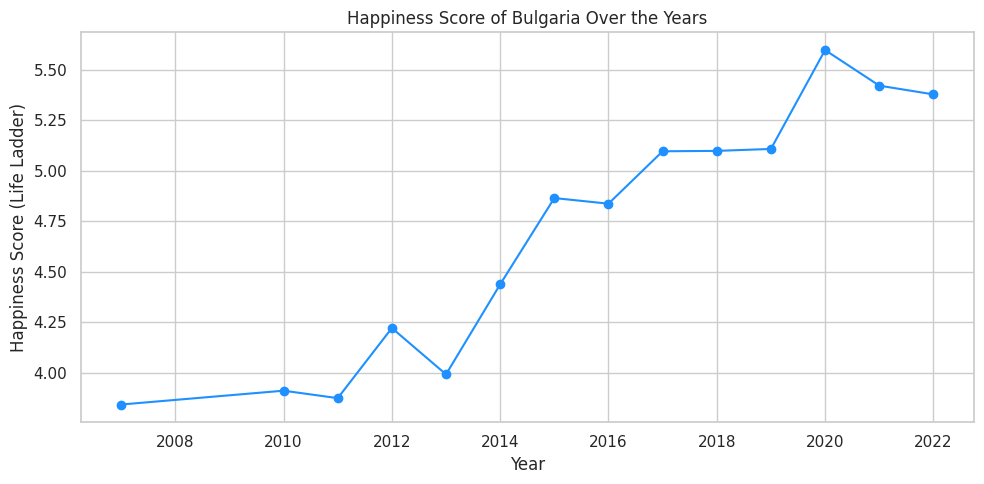

In [ ]:
# Bulgaria
bulgaria_data = world_happiness[world_happiness['Country Name'] == 'Bulgaria']

# plot
plt.figure(figsize=(10, 5))
plt.plot(bulgaria_data['Year'], bulgaria_data['Life Ladder'], marker='o', linestyle='-', color='dodgerblue')

plt.title('Happiness Score of Bulgaria Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score (Life Ladder)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
unhappiest_countries = ["Afghanistan", "Lebanon", "Zimbabwe", "Rwanda", "Botswana"]
least_happy = world_happiness[world_happiness['Country Name'].isin(unhappiest_countries)]

X = least_happy[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = least_happy['Life Ladder']

# missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # remove rows with missing values
y = y[X.index]

X = sm.add_constant(X)
model_least = sm.OLS(y, X).fit()
print(model_least.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     13.77
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           6.37e-10
Time:                        23:34:04   Log-Likelihood:                -56.220
No. Observations:                  70   AIC:                             126.4
Df Residuals:                      63   BIC:                             142.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
most_happy_countries = ["Finland", "Denmark", "Iceland", "Switzerland", "Netherlands"]
most_happy = world_happiness[world_happiness['Country Name'].isin(most_happy_countries)]

X = most_happy[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = most_happy['Life Ladder']

# missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # remove rows with missing values
y = y[X.index]

X = sm.add_constant(X)
model_most = sm.OLS(y, X).fit()
print(model_most.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     11.93
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           9.09e-09
Time:                        23:34:04   Log-Likelihood:                 43.646
No. Observations:                  67   AIC:                            -73.29
Df Residuals:                      60   BIC:                            -57.86
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
influential_countries = ["USA", "China", "Russia", "Germany", "United Kingdom", "South Korea", "France", "Japan"]
select_countries2 = world_happiness[world_happiness['Country Name'].isin(influential_countries)]

X = select_countries2[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = select_countries2['Life Ladder']

# missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # remove rows with missing values
y = y[X.index]

X = sm.add_constant(X)
model_top8 = sm.OLS(y, X).fit()
print(model_top8.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     74.49
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           2.37e-32
Time:                        23:34:04   Log-Likelihood:                 3.4668
No. Observations:                  95   AIC:                             7.066
Df Residuals:                      88   BIC:                             24.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# t-test
african_countries = world_happiness[world_happiness['Regional Indicator'].isin(["Middle East and North Africa", "Sub-Saharan Africa"])]
but_african_countries = world_happiness[~world_happiness['Regional Indicator'].isin(["Middle East and North Africa", "Sub-Saharan Africa"])]

t_stat, p_value = ttest_ind(african_countries['Life Ladder'], but_african_countries['Life Ladder'])
print("t-test results: t-statistic =", t_stat, "p-value =", p_value)

t-test results: t-statistic = -24.81210978814293 p-value = 5.110434315050163e-120


In [ ]:
X = world_happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']]
y = world_happiness['Life Ladder']

# missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()  # remove rows with missing values
y = y[X.index]

X = sm.add_constant(X)
model_all = sm.OLS(y, X).fit()
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     995.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:34:04   Log-Likelihood:                -1669.8
No. Observations:                1964   AIC:                             3354.
Df Residuals:                    1957   BIC:                             3393.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

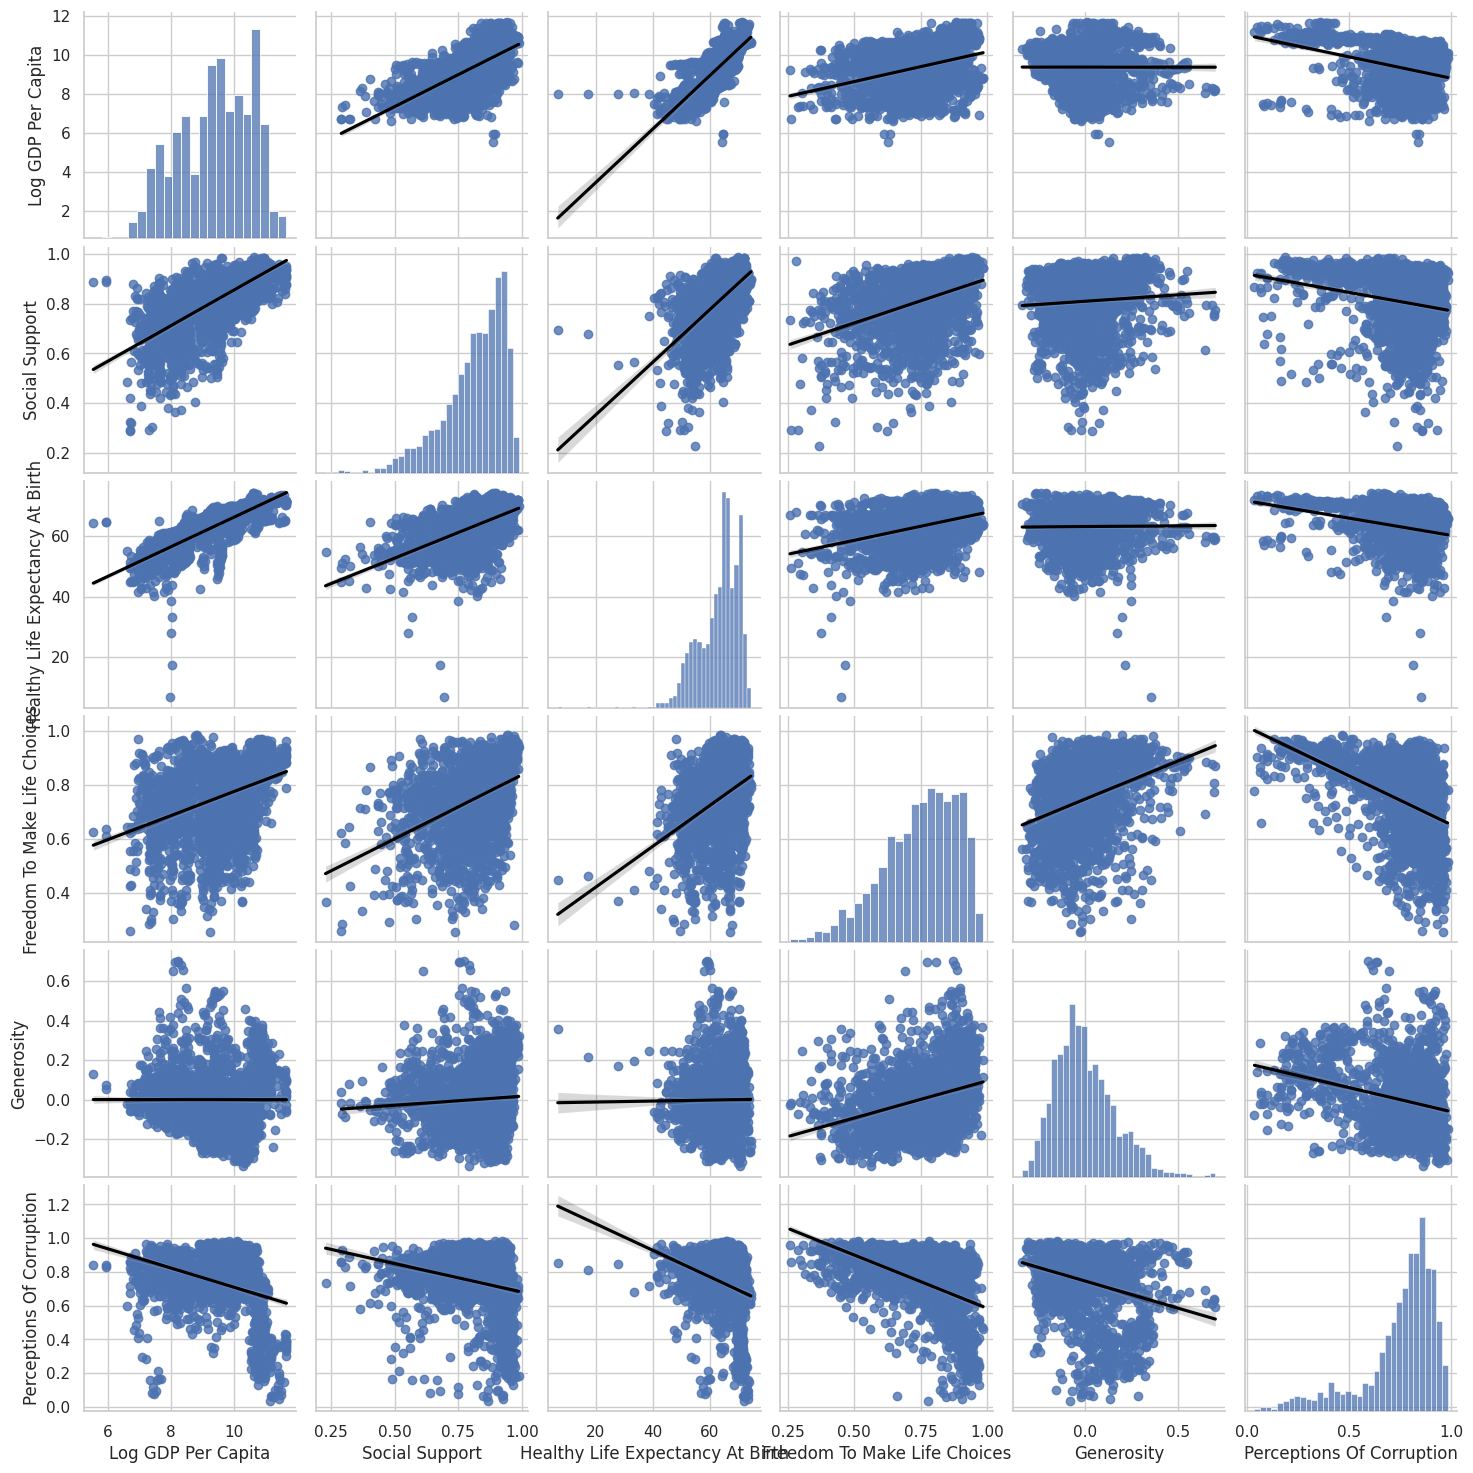

In [ ]:
# multicollinearity test
sns.pairplot(data=world_happiness,
             vars=["Log GDP Per Capita", "Social Support", "Healthy Life Expectancy At Birth", "Freedom To Make Life Choices", "Generosity", "Perceptions Of Corruption"],
             kind='reg', plot_kws={'line_kws':{'color':'black'}})
plt.show()